# Movie Recommender System

![image](images/movie_poster.jpeg)

***
* __Group 17__
* Student names:
    - [Fredrick Kyeki](https://github.com/FREDRICKKYEKI)
    - [Stacy Kiriiri](https://github.com/kiriiri)
    - [Wilfred Kivinda](https://github.com/willieki)
* Student pace: **part time**
* Scheduled project review date/time: $1st - 10th December, 2023$
* Instructor name: __Stella Waithera__
***

Table of contents
===============
- [Business Understanding](#Business-Understanding:)
- [Data Understanding](#Data-Understanding:)
- [Data Preprocessing](#Data-Cleaning:)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Generating a Recommendation System](#Generating-the-Recommender-System)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation:)

## Overview


**Objective:**
The goal of this project is to design and implement a movie recommender system that provides personalized recommendations to users based on their preferences and viewing history. The system employs various collaborative and content-based filtering techniques to enhance the accuracy and relevance of movie suggestions.

**Key Components:**

1. **Data Collection:**
   - Utilized a movie dataset containing information about movies, genres, user ratings, and tags.
   - Explored and cleaned the dataset to prepare it for modeling.

2. **Exploratory Data Analysis (EDA):**
   - Analyzed the dataset to understand its structure, features, and distributions.
   - Visualized key patterns, such as user preferences and movie popularity, to gain insights.

3. **Content-Based Filtering:**
   - Implemented a content-based recommender system using movie genres.
   - Explored the use of TF-IDF vectors to represent movie content and calculate similarities.

4. **Neighborhood-Based Collaborative Filtering (KNN):**
   - Implemented a neighborhood-based collaborative filtering model using SciKit Learn's KNN.
   - Explored both user-based and item-based collaborative filtering approaches.
   - Evaluated the model's performance using metrics such as RMSE and MAE.

5. **Model-Based Collaborative Filtering (SVD):**
   - Implemented a model-based collaborative filtering approach using the Surprise library and Singular Value Decomposition (SVD).
   - Evaluated the model's performance and explored hyperparameter tuning.

6. **Hybrid Approach:**
   - Recommended a hybrid model that combines the strengths of content-based and collaborative filtering approaches.
   - Highlighted the potential benefits of leveraging both user-item interactions and content features.


Business Understanding:
=======

Objective:
-------------
The primary objective of the recommender system project is to enhance user satisfaction and engagement on the MovieLens platform by delivering personalized and relevant movie recommendations. The recommender system aims to provide users with tailored suggestions based on their historical movie ratings and tagging activities, ultimately improving their overall experience.

Scope:
-------------
The project will focus on implementing a collaborative filtering-based recommender system, leveraging the ml-latest-small dataset from MovieLens. The recommendations will be centered around user preferences, ensuring that users discover movies aligned with their tastes and interests. The scope includes both explicit ratings and user-generated tags as valuable indicators of user preferences.

Success Criteria:
-------------
The success of the recommender system will be evaluated based on several key performance indicators (KPIs):
##### User Engagement:
Increase in the number of user interactions with the platform, including ratings, tags, and time spent on the website.
##### Recommendation Accuracy:
Improvement in the precision and relevance of movie recommendations, reducing instances of irrelevant or disliked suggestions.
#####  User Satisfaction:
Positive feedback from users, measured through surveys, reviews, and user ratings.
##### Platform Adoption:
Growth in the number of registered users and active users leveraging the recommendation features.

Data Understanding:
=======

## Data Source:

The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were 
generated by 610 users between March 29, 1996, and September 24, 2018.

The data used in this project will be pulled from 4 different separate file:

##### 1. Movies Data (movies.csv):

Contains movie information, including titles and genres.

Columns: 

 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).


##### 2. Links Data (links.csv):

Provides identifiers for linking to external movie-related sources (IMDb, TMDb).

Columns:

* movieId: Unique identifier for each movie, consistent with other data files.

* imdbId: Identifier for movies used by IMDb (Internet Movie Database).

* tmdbId: Identifier for movies used by TMDb (The Movie Database).

##### 3. Ratings Data (ratings.csv):


Each entry represents a user's rating for a specific movie.

Contains user ratings on a 5-star scale for movies.

Columns: 

* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

##### 4. Tags Data (tags.csv):

Contains user-generated metadata (tags) about movies.

Columns: 
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [21]:
## **IMPORTING NECESSARY LIBRARIES**
import pandas as pd 
import numpy as np

In [22]:
# Datasets
movies =  "datasets/ml-latest-small/movies.csv"
links =   "datasets/ml-latest-small/links.csv"
ratings = "datasets/ml-latest-small/ratings.csv"
tags =    "datasets/ml-latest-small/tags.csv"

data = {"movies":None, "links": None, "ratings": None, "tags": None}

for key in data.keys():
    data[key] = pd.read_csv(f"datasets/ml-latest-small/{key}.csv")

#### EXPLORING DATAFRAMES

Datasets Lengths

In [23]:
print("Length of each data-set:")
for k, v in data.items():
    print(k, ":",len(v))

Length of each data-set:
movies : 9742
links : 9742
ratings : 100836
tags : 3683


Top five of each:

In [24]:
data["movies"].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
data["links"].head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [26]:
data["ratings"].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
data["tags"].head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [28]:
print("Summary of each data-set:\n")
for k, v in data.items():
    print(k, "\n")
    print(v.info())
    print("="*100, "\n")

Summary of each data-set:

movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

links 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movie

In [29]:
print("Colums of each data-set:\n")
all_columns = []
for k, v in data.items():
    print(k, "\n")
    all_columns += list(v.columns)
    print(list(v.columns))
    print("="*100, "\n")

print("all unique columns", set(all_columns))

Colums of each data-set:

movies 

['movieId', 'title', 'genres']

links 

['movieId', 'imdbId', 'tmdbId']

ratings 

['userId', 'movieId', 'rating', 'timestamp']

tags 

['userId', 'movieId', 'tag', 'timestamp']

all unique columns {'tmdbId', 'genres', 'tag', 'title', 'imdbId', 'userId', 'rating', 'movieId', 'timestamp'}


### MERGING DATAFRAMES

In [30]:
# merging movies df and link df using an inner join
movies_df = data["movies"]
links_df = data["links"]

# Using join with movies_df as the left DataFrame
merged_movies_links = movies_df.join(links_df.set_index("movieId"), on="movieId", how="inner")

# Display the shape of the resulting DataFrame
print(merged_movies_links.shape)

(9742, 5)


In [31]:
merged_movies_links.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [32]:
# Left outer join with ratings_df and specify suffixes
merged_data_ratings = merged_movies_links.join(data["ratings"].set_index("movieId"), on="movieId", how="left", lsuffix='_movies_links', rsuffix='_ratings')

# Left outer join with tags_df and specify suffixes
df = merged_data_ratings

# Display the first few rows of the resulting DataFrame
print(f"Final Merged Data has {df.shape[0]} rows and {df.shape[1]} columns:")
df.head()

Final Merged Data has 100854 rows and 8 columns:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09


In [33]:
df[['userId', "movieId"]]

,userId,movieId
0,1.0,1
0,5.0,1
0,7.0,1
0,15.0,1
0,17.0,1
...,...,...
9737,184.0,193581
9738,184.0,193583
9739,184.0,193585
9740,184.0,193587


In [34]:
print(f"The Final dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The Final dataframe has 100854 rows and 8 columns


## Data Cleaning:

#### Dealing with missing values:

In [35]:
# Checking for missing values in each column
missing_values = df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The tmdbId column has 13 missing values
The userId column has 18 missing values
The rating column has 18 missing values
The timestamp column has 18 missing values


In [36]:
# Calculating percentage of missing values in each column
missing_percentage = df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,tmdbId,0.012890
1,userId,0.017848
2,rating,0.017848
3,timestamp,0.017848


In [37]:
# dropped all the missing values in tmdbId,userId_x,timestamp_x,userId_y,tag,timestamp_y columns
# 	movieId	title	genres	imdbId	tmdbId	userId	rating	timestamp	userId_tags	tag	timestamp_tags

df.dropna(subset = ['tmdbId', 'userId','timestamp','rating'], inplace=True)

In [38]:
missing_values1 = df.isna().sum()

for column, count in missing_values1.items():
        print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The imdbId column has 0 missing values
The tmdbId column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


#### Handling duplicates:

In [39]:
duplicated_rows = df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


#### Confirm data types:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100823 non-null  float64
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.9+ MB


In [41]:
# Converting user IDs and tmdbId to object data type
df[['userId', 'tmdbId']] = df[['userId', 'tmdbId']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  object 
 5   userId     100823 non-null  object 
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


#### Handling Outliers

In [42]:
# OUTLIERS IN RATING COLUMN
df.value_counts(['rating'])

rating
4.0       26816
3.0       20044
5.0       13209
3.5       13134
4.5        8551
2.0        7550
2.5        5550
1.0        2811
1.5        1791
0.5        1367
Name: count, dtype: int64

In [43]:
import plotly.express as px

# a box plot to visualize outliers in rating column 
fig = px.box(df, y='rating', title='Box Plot of Rating Outliers')

fig.update_layout(
    title=dict(text='Box Plot of Rating with Outliers', x=0.5, y=0.95), 
)

fig.show()

max_rating = df['rating'].max()
min_rating = df['rating'].min()
print(f"The maximum rating is {max_rating}")
print(f"The minimum rating is {min_rating}")

The maximum rating is 5.0
The minimum rating is 0.5


### Exploratory Data Analysis

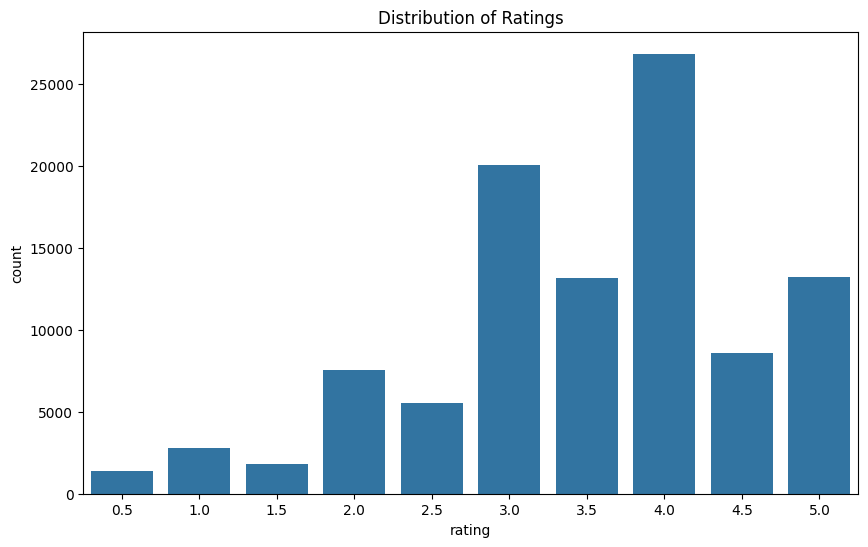

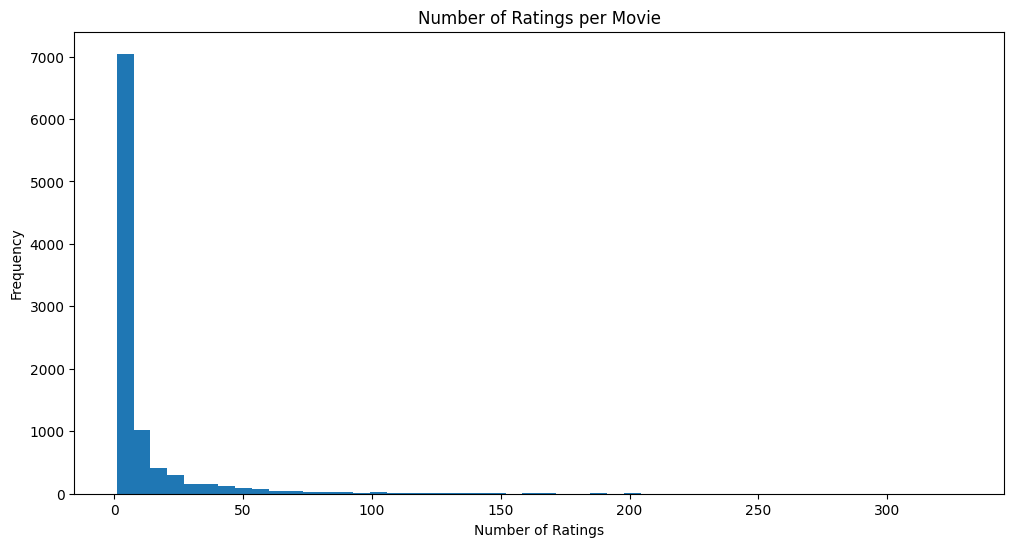

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Number of ratings per movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_movie['rating'], bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


C:\Users\Alus\AppData\Local\Temp\ipykernel_13036\2708379592.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



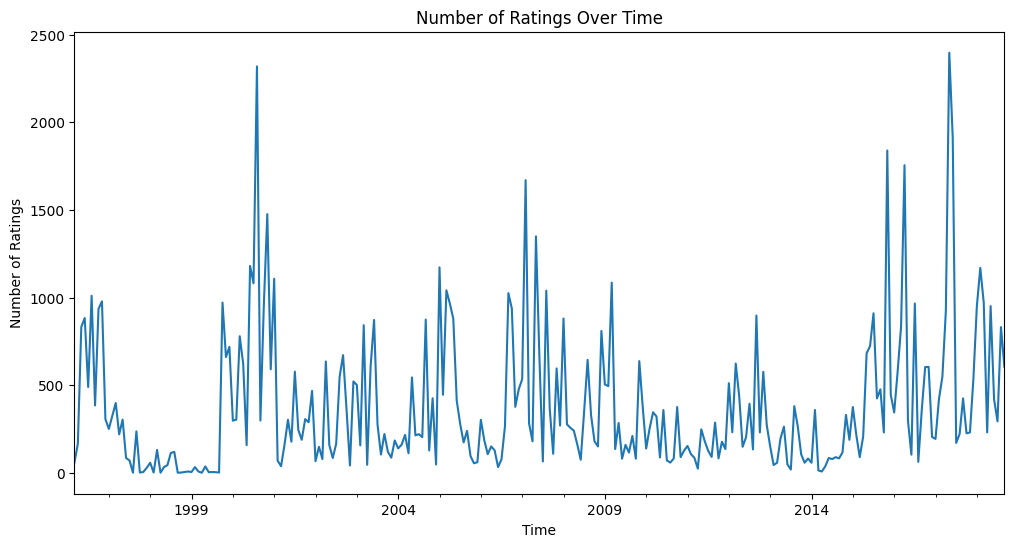

In [45]:
import datetime

ratings = data["ratings"]

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Plot the number of ratings over time
plt.figure(figsize=(12, 6))
ratings.set_index('timestamp').resample('M').size().plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

In [46]:
!pip install wordcloud

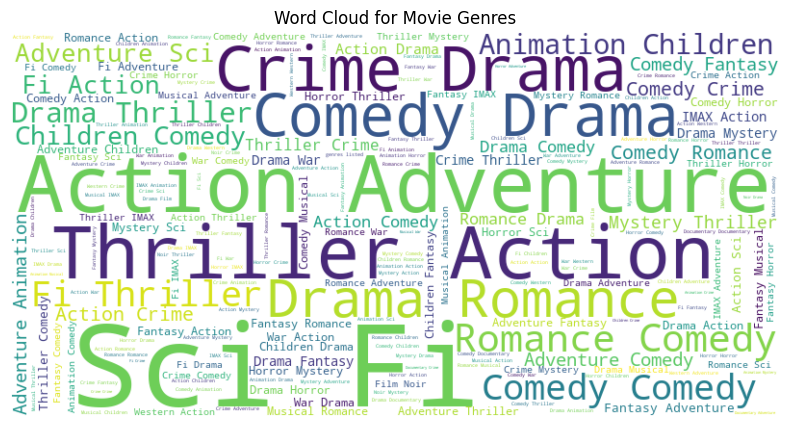

In [47]:
from wordcloud import WordCloud

# Generate a word cloud for movie genres
genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['genres']))

plt.figure(figsize=(10, 5))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Genres')
plt.show()

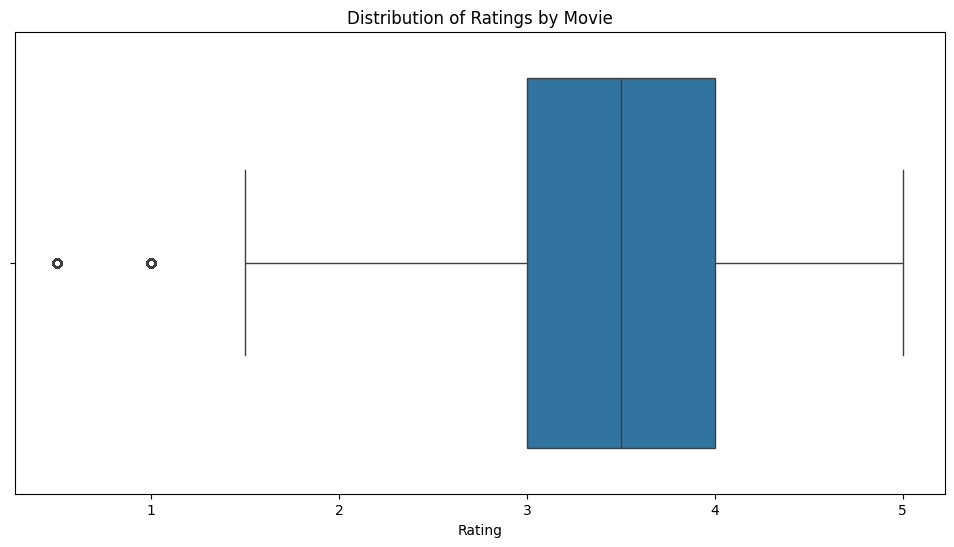

In [48]:
# Boxplot of ratings by movie
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', data=df)
plt.title('Distribution of Ratings by Movie')
plt.xlabel('Rating')
plt.show()

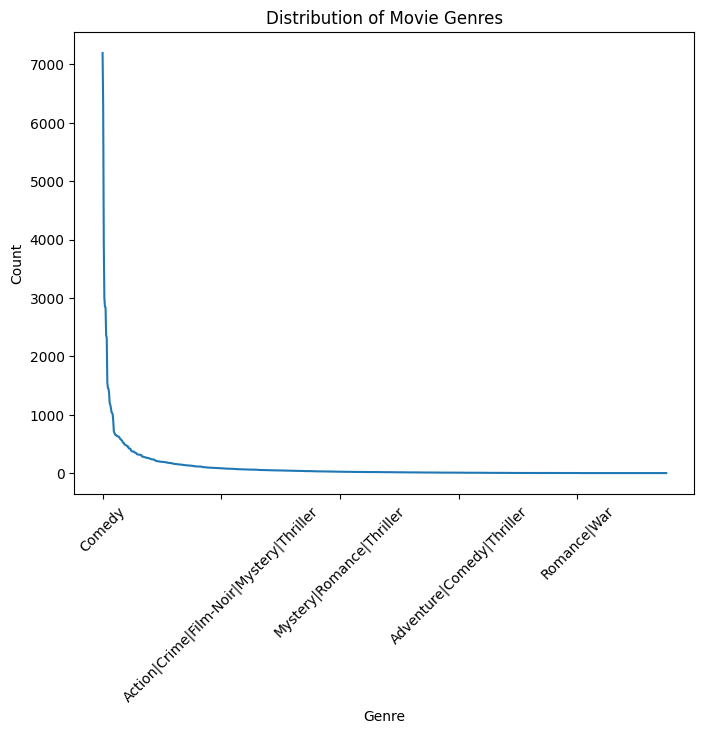

In [49]:
# Creating a lineplot of the 'genre' column

fig, ax = plt.subplots(figsize=(8,6))

genre_counts = df['genres'].value_counts()

# plot the lineplot
genre_counts.plot()

plt.xticks(rotation=45)

#Set the axis labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')

# Show the plot
plt.show();

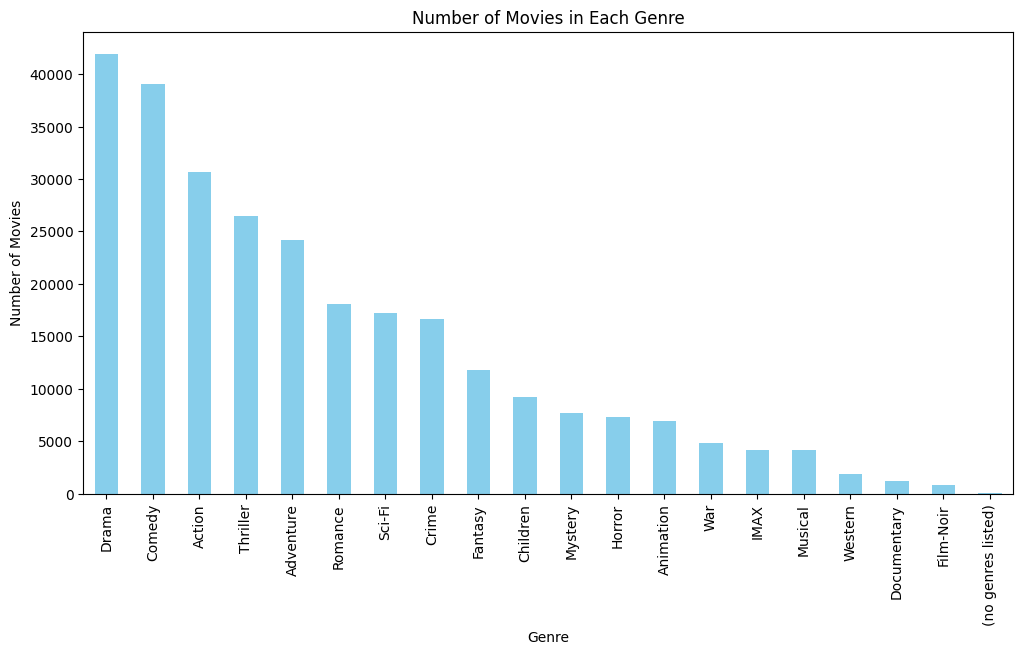

In [50]:
# count of movies in each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\Alus\AppData\Local\Temp\ipykernel_13036\4052738780.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




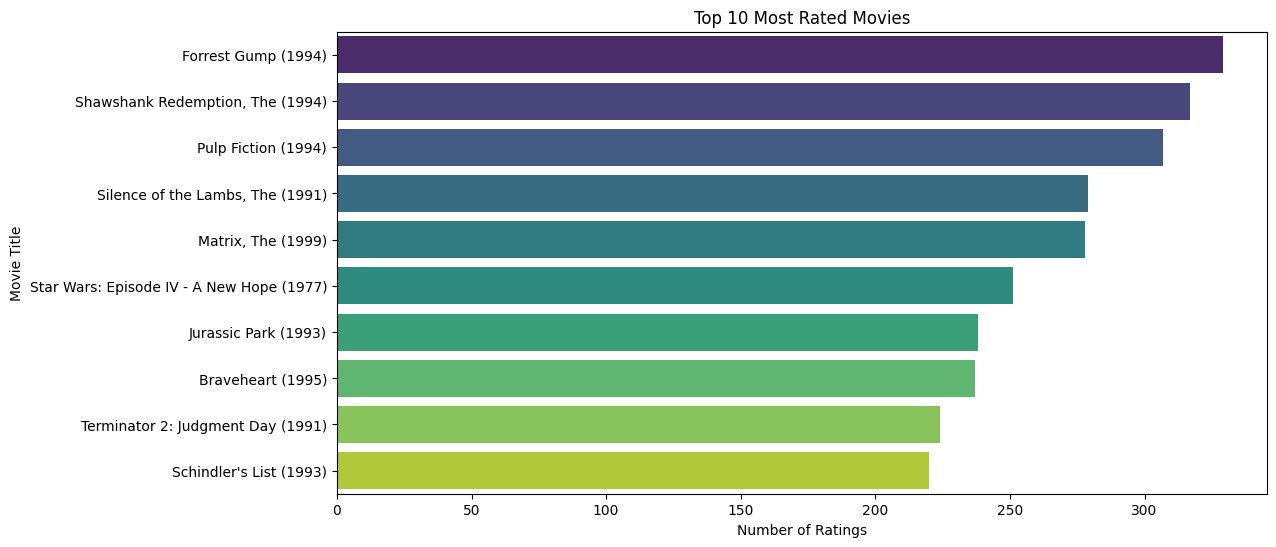

In [51]:
# top N most rated movies.
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

## Generating the Recommender System

It's time to now come up with a recommender system, and for that there are a few choices we have as listed below:

**1. Unpersonalized:**
    - We could simply recommend the most popular movies for every use but that would throw away the desired user experience brought by a personalized system.\
**2. Personalized:**
    - This leads us to use a personalized approach in this system, and for that, we have the choices below:
```
|---> Content-based filtering
|---> Collaborative filtering
    |---> Memory/Neighbourhood based (KNN)
    |---> Model based (Matrix factorization)
        |---> Singular Value Decomposition
        |---> Alternating Least Squares

```

The goal is try out all the systems and pick out the best recommmendation system.

### Content-based filtering:

In the context of this data-set, a content-based recommendation system is one where we recommend a movie similar to one a user likes. We will use the genres for the content-based filtering which is shown below:

In [52]:
# genres in the dataframe
df["genres"]

0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 100823, dtype: object

There is a slight problem though. After merging our dataframe with the ratings, the dataframe expanded from 9742 to 100000+ records, which will present a slight problem with computation.

In [53]:
df.shape

(100823, 8)

So this leads us to use the dataset without the ratings and tags, which we stored in a variable called __merged_movies_links__.

#### Procedure:
- We shall use the __SciKit Learn's TfidfVectorizer__, which is a class from scikit-learn, a popular machine learning library in Python, used for converting a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.
    - We shall then fit the __genres__ into the TfidfVectorizer which yields a sparse matrix.
- To compute a similarity matrix, we then use a sigmoid kernel, which computes the similarity of movies given the index.

__Note__: As a safety measure, we fill in any NaN values with an empty text to enable the machine learning algorithm to work well

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
merged_movies_links['genres'] = merged_movies_links['genres'].fillna('')
# replace the pipes '|' from the genres with 'commas'
merged_movies_links['genres'] = merged_movies_links['genres'].map(lambda x: ", ".join(x.split("|")))
# genres
merged_movies_links['genres'].head()

0    Adventure, Animation, Children, Comedy, Fantasy
1                       Adventure, Children, Fantasy
2                                    Comedy, Romance
3                             Comedy, Drama, Romance
4                                             Comedy
Name: genres, dtype: object

In [55]:
tfv_matrix = tfv.fit_transform(merged_movies_links['genres'])
tfv_matrix

<9742x402 sparse matrix of type '<class 'numpy.float64'>'
	with 42867 stored elements in Compressed Sparse Row format>

In [56]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [57]:
print("length of the similarity matrix:", len(sig))
print(sig[0])

length of the similarity matrix: 9742
[0.76263689 0.76180765 0.76164424 ... 0.76159416 0.76172628 0.76173151]


We create a reverse map of the movies titles, which helps us get a movie index just by the name as shown:

In [58]:
# reverse mapping of indices and movie titles
indices = pd.Series(merged_movies_links.index, index=merged_movies_links['title']).drop_duplicates()
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [59]:
# test
indices['No Game No Life: Zero (2017)']

9738

In [60]:
list(enumerate(sig[indices['Toy Story (1995)']]))[:5]

[(0, 0.7626368906233343),
 (1, 0.7618076535093508),
 (2, 0.7616442356858768),
 (3, 0.7616291558555321),
 (4, 0.7617315097208257)]

In [61]:
def get_title(text, df=df):
    """Gets movie title matching `text`
    returns:
        title - title of movie matching the input
        genres - the movie's genres 
    """
    mask = df['title'].str.contains(text, case=False, regex=False)
    title = df.loc[mask, 'title'].head(1).values[0] if any(mask) else None
    
    if not title:
        print(f"\n'{text}' does not match any movies. Please try again")
        return None, None

    return title, df.loc[mask].head(1)["genres"].values[0]

In [62]:
# test
print(get_title("Superman (1978)", df))
print()
print(get_title("NibK7Iv", df))

('Superman (1978)', 'Action|Adventure|Sci-Fi')


'NibK7Iv' does not match any movies. Please try again
(None, None)


In [63]:
def give_rec(title, sig=sig):
    """Get the index corresponding to title"""
    try:
        # get title
        title, genres = get_title(title, merged_movies_links)
        
        # print the movie title matching the text
        if title:
            print(f"Recommendation for {title}")
            print("Genres: ", genres)
        
        idx = indices[title]
        
        # Get the pairwsie similarity scores 
        sig_scores = list(enumerate(sig[idx]))

        # Sort the movies 
        sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

        # Scores of the 10 most similar movies
        sig_scores = sig_scores[1:11]

        # Movie indices
        movie_indices = [i[0] for i in sig_scores]

        # Top 10 most similar movies
        return merged_movies_links.iloc[movie_indices].drop_duplicates()
    except Exception as _:
        print(_)
        return "⚠ Oops! Something went wrong!"
    
    
    
# test
give_rec('superman')

Recommendation for Superman (1978)
Genres:  Action, Adventure, Sci-Fi


,movieId,title,genres,imdbId,tmdbId
224,260,Star Wars: Episode IV - A New Hope (1977),"Action, Adventure, Sci-Fi",76759,11.0
275,316,Stargate (1994),"Action, Adventure, Sci-Fi",111282,2164.0
385,442,Demolition Man (1993),"Action, Adventure, Sci-Fi",106697,9739.0
898,1196,Star Wars: Episode V - The Empire Strikes Back...,"Action, Adventure, Sci-Fi",80684,1891.0
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),"Action, Adventure, Sci-Fi",86190,1892.0
1058,1375,Star Trek III: The Search for Spock (1984),"Action, Adventure, Sci-Fi",88170,157.0
1346,1831,Lost in Space (1998),"Action, Adventure, Sci-Fi",120738,2157.0
1557,2094,"Rocketeer, The (1991)","Action, Adventure, Sci-Fi",102803,10249.0
1567,2105,Tron (1982),"Action, Adventure, Sci-Fi",84827,97.0
1692,2275,Six-String Samurai (1998),"Action, Adventure, Sci-Fi",118736,24746.0


In [64]:
give_rec("Tron (1982)")

Recommendation for Tron (1982)
Genres:  Action, Adventure, Sci-Fi


,movieId,title,genres,imdbId,tmdbId
224,260,Star Wars: Episode IV - A New Hope (1977),"Action, Adventure, Sci-Fi",76759,11.0
275,316,Stargate (1994),"Action, Adventure, Sci-Fi",111282,2164.0
385,442,Demolition Man (1993),"Action, Adventure, Sci-Fi",106697,9739.0
898,1196,Star Wars: Episode V - The Empire Strikes Back...,"Action, Adventure, Sci-Fi",80684,1891.0
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),"Action, Adventure, Sci-Fi",86190,1892.0
1058,1375,Star Trek III: The Search for Spock (1984),"Action, Adventure, Sci-Fi",88170,157.0
1346,1831,Lost in Space (1998),"Action, Adventure, Sci-Fi",120738,2157.0
1557,2094,"Rocketeer, The (1991)","Action, Adventure, Sci-Fi",102803,10249.0
1567,2105,Tron (1982),"Action, Adventure, Sci-Fi",84827,97.0
1692,2275,Six-String Samurai (1998),"Action, Adventure, Sci-Fi",118736,24746.0


#### Summary of the output:
As we can see, the system works for the most part, but it inherently has a few issues:
- It only recommends by genre, which is shallow and insufficient, as it doesn't scoop out the patterns deeply embedded in our dataset.
- Ratings, which are a high indicator of preference aren't used, so the system is to a degree, not as effective.
- Finally, as demonstrated above, the recommendation is somewhat 'rigid', meaning, if a movie's genre is Action, Adventure and Sci-fi, then one can only get a movie with the same exact genres. 

For a more flexible system which goes deeper into the data-set, we have to use a collaborative filtering approach.

### Collaborative filtering
Collaborative filtering can be user-based or item-based. User-based collaborative filtering recommends items based on the preferences of users with similar tastes, while item-based collaborative filtering recommends items similar to those the user has liked.
#### Memory/ Neighbourhood based:
- For this, we first create a pivot table, from which we'll derive our sparse matrix: 

In [65]:
## First lets create a Pivot matrix
knnrc_df=df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
knnrc_df.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
knnrc_df.shape

(9713, 610)

In [67]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

movie_features_df_matrix = csr_matrix(knnrc_df.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
# reverse map using the pivot matrix
new_indices = {value: index for index, value in enumerate(knnrc_df.index)}

In [69]:
# test
query_index = new_indices['Tron (1982)']
distances, indices = model_knn.kneighbors(knnrc_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(knnrc_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, knnrc_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Tron (1982):

1: RoboCop (1987), with distance of 0.4333110059193197:
2: Logan's Run (1976), with distance of 0.5173426988364118:
3: Cocoon (1985), with distance of 0.5194918665320847:
4: Total Recall (1990), with distance of 0.5267681600937928:
5: Star Wars: Episode I - The Phantom Menace (1999), with distance of 0.5270073286035528:


Let's now use __surprise__ library aso as to be able to validate our models:

In [70]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV, cross_validate

reader = Reader(rating_scale=(1, 5))

expected_column_names = ["userId", "movieId", "rating"]

# Load the data into a Surprise Dataset
data_surp = Dataset.load_from_df(df[expected_column_names], reader)

In [71]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data_surp, n_jobs=-1)


# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline, data_surp)


Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [72]:
for i in cv_knn_baseline.items():
    print(i)
    
print('-----------------------')
# print validation results
np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.87933312, 0.8741619 , 0.86460719, 0.87760048, 0.88413962]))
('test_mae', array([0.67130368, 0.66481172, 0.66246556, 0.67080251, 0.67832901]))
('fit_time', (0.8842349052429199, 0.8355486392974854, 0.8548538684844971, 1.0899107456207275, 0.8826932907104492))
('test_time', (2.0979721546173096, 1.6544148921966553, 1.709216833114624, 1.505162000656128, 1.404783010482788))
-----------------------


0.8759684624331247

In [73]:
# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
# print validation results
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.96991583, 0.96436321, 0.96999268, 0.97168794, 0.98004668]))
('test_mae', array([0.74870561, 0.74405465, 0.74860401, 0.75272883, 0.75530905]))
('fit_time', (1.0629208087921143, 1.0658962726593018, 1.0515937805175781, 1.0167760848999023, 0.6530346870422363))
('test_time', (3.1979546546936035, 3.198500394821167, 3.2070882320404053, 3.1448380947113037, 1.2327134609222412))
-----------------------
0.9712012692100856


**Summary of Surprise lib's KNN:**
- The KNN Basic and KNN Baseline models exhibit similar RMSE, with the KNN Baseline slightly outperforming the KNN Basic model.
- Both KNN models have relatively low MAE, indicating good accuracy in predicting user ratings.
- The training time for the KNN models is relatively short, making them efficient for training.
- The SVD model has a slightly higher RMSE compared to the KNN models, but its overall performance is still competitive.

The choice between these models depends on specific use-case requirements, including the trade-off between accuracy and computational efficiency. Further analysis and potential hyperparameter tuning could refine the performance of these models.

Let's make a function to test out the KNN method

In [74]:
def knn_get_rec(title, rec=6, verbose=True):
    """Get recommendations for a movie using KNN
    """
    # create a return dataframe
    ret_df = pd.DataFrame()
    # initiate an empty list to fill the knn distances
    dists = []
    try:
        # get movie details and the pivot matrix index
        title, genres = get_title(title, df)
        idx = new_indices[title]
        
        # compute the knn distance and index
        distances, knn_indices = model_knn.kneighbors(knnrc_df.iloc[idx,:].values.reshape(1, -1), n_neighbors = rec + 1)

        if title and verbose:
            print(f'Recommendations for {title}:')
            print(f"Genres: {', '.join(genres.split('|'))}")

        for i in range(0, len(distances.flatten())):
            if i == 0:
                continue
            rec_movie = knnrc_df.index[knn_indices.flatten()[i]]
            movies_df = data['movies']
            mask = movies_df['title'].str.contains(rec_movie, case=False, regex=False)
            
            # fill in return dataframe
            ret_df = pd.concat([ret_df, movies_df[mask]])
            
            # fill in the knn distances in the df
            dists.append(distances.flatten()[i])

        ret_df["knn_distance"] = dists

        return ret_df

    except Exception as _:
        return "⚠ Oops! Something went wrong!"
        

# test
knn_get_rec('infinity war', 10)

Recommendations for Avengers: Infinity War - Part I (2018):
Genres: Action, Adventure, Sci-Fi


,movieId,title,genres,knn_distance
9709,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,0.197364
8694,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,0.218983
8699,122926,Untitled Spider-Man Reboot (2017),Action|Adventure|Fantasy,0.303779
8688,122898,Justice League (2017),Action|Adventure|Sci-Fi,0.395773
8695,122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,0.408945
8696,122920,Captain America: Civil War (2016),Action|Sci-Fi|Thriller,0.424481
8697,122922,Doctor Strange (2016),Action|Adventure|Sci-Fi,0.450223
9604,176371,Blade Runner 2049 (2017),Sci-Fi,0.454227
8692,122906,Black Panther (2017),Action|Adventure|Sci-Fi,0.456780
9418,165639,While You Were Fighting: A Thor Mockumentary (...,Comedy|Fantasy|Sci-Fi,0.457608


In [75]:
# test 2
knn_get_rec('spider-man', 10)

Recommendations for Spider-Man (2002):
Genres: Action, Adventure, Sci-Fi, Thriller


,movieId,title,genres,knn_distance
5260,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,0.267842
3832,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,0.303643
3873,5445,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,0.338738
4334,6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,0.361211
2836,3793,X-Men (2000),Action|Adventure|Sci-Fi,0.370047
4427,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,0.375362
3638,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.379254
4351,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,0.387891
4137,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0.388087
3854,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,0.389831


#### Sumarry of the Neighbourhood based collaborative approach (SciKit's):
- This model works better than the content-based approach as it makes use of the user ratings, thereby reading more into the dataset.
    - However, neighbourhood-based collaborative filtering has some limitations, particularly in scenarios with sparse data, the cold start problem for new users or items, and scalability issues as the dataset grows. Therefore, it becomes essential to explore model-based approaches like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS).



In [76]:
def surp_knn_get_rec(uid=1000, rec_count=10):
    # Load the dataset and create a train-test split
    reader = Reader(rating_scale=(1, 5))
    data_ = Dataset.load_from_df(df[expected_column_names], reader)
    trainset, _ = train_test_split(data_, test_size=0.2, random_state=42)

    # Train the KNN model
    sim_options = {'name': 'pearson', 'user_based': True}
    knn_model = KNNBasic(sim_options=sim_options)
    knn_model.fit(trainset)

    # Get the user's unrated items
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]

    # Predict ratings for unrated items
    predictions = [knn_model.predict(uid, iid) for iid in unrated_items]

    # Sort the predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Extract the top N recommended items
    top_recommendations = sorted_predictions[:rec_count]

    # Print or return the recommended items
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]

    return recommended_movies

# test
surp_knn_get_rec(uid=100, rec_count=10)

Computing the pearson similarity matrix...
Done computing similarity matrix.


,movieId,title,genres
36,40,"Cry, the Beloved Country (1995)",Drama
107,123,Chungking Express (Chung Hing sam lam) (1994),Drama|Mystery|Romance
265,305,Ready to Wear (Pret-A-Porter) (1994),Comedy
346,389,"Colonel Chabert, Le (1994)",Drama|Romance|War
467,534,Shadowlands (1993),Drama|Romance
525,613,Jane Eyre (1996),Drama|Romance
531,626,"Thin Line Between Love and Hate, A (1996)",Comedy
536,633,Denise Calls Up (1995),Comedy
548,650,Moll Flanders (1996),Drama
557,670,"World of Apu, The (Apur Sansar) (1959)",Drama


In [77]:
# test 2
surp_knn_get_rec(uid=300, rec_count=5)

Computing the pearson similarity matrix...
Done computing similarity matrix.


,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama
202,236,French Kiss (1995),Action|Comedy|Romance
245,283,New Jersey Drive (1995),Crime|Drama
292,334,Vanya on 42nd Street (1994),Drama
450,515,"Remains of the Day, The (1993)",Drama|Romance


### Model-Based Methods - Matrix Factorization using SVD:

Let's try out a matric factorization technique on the data, by singular value decomposition:

In [78]:
param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)

gs_model.fit(data_surp)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   30.7s finished


In [79]:
best_params = gs_model.best_params["rmse"]

In [80]:
trainset, testset = train_test_split(data_surp, test_size=0.2)

svd = SVD(**best_params)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8935
0.893502441565194


A value of 0.8925 suggests that, on average, the predicted ratings deviate by approximately 0.8925 from the true ratings. Lower RMSE values indicate better predictive accuracy.

In [81]:
# test
svd.predict(uid="230", iid=23)

Prediction(uid='230', iid=23, r_ui=None, est=3.381780444330384, details={'was_impossible': False})

In [82]:
def svd_get_rec(uid=1000, rec_count=0):
    """Returns top 10 movies using SVD
    Parameters:
    ===========
    uid - user id
    rec_count - movie recommendation count
    """
    trainset, testset = train_test_split(data_surp, test_size=0.2)
    # Get the user's unrated items
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]

    # Predict ratings for unrated items
    predictions = [svd.predict(uid, iid) for iid in unrated_items]

    # Sort the predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Extract the top N recommended items
    top_recommendations = sorted_predictions[:rec_count]

    # Print or return the recommended items
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]

    return recommended_movies

# test
svd_get_rec(uid=100, rec_count=10)

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
680,898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
686,904,Rear Window (1954),Mystery|Thriller
694,912,Casablanca (1942),Drama|Romance
841,1104,"Streetcar Named Desire, A (1951)",Drama
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War
909,1208,Apocalypse Now (1979),Action|Drama|War
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


### Summary of the models:


## Final Recommender System:

For the final recommender system, we decided to go with SciKit Learn's  recommender system (which is a neighbourhood based (KNN) system). 
> The main reason for this is because, it is easy to test out an item-item based movie system more than a user-user, after running the recommender functions, because the items are familiar more than the users.


#### How the final system works:
1. take in a user id.
2. randomly select movies they highly rated.
3. return 10 recommendations based on the movies liked.
4. If no id given, use the unpersonalized recommender.

In [83]:
def top_ten_highly_rated(uid, rec=10):
    """returns a list of movies highly rated by a user"""
    mask = data["ratings"]['userId'] == uid
    user_movies = data["ratings"][mask].sort_values(by=['rating'], ascending=False).head(rec)
    user_movies = pd.merge(data["movies"], user_movies, how="inner", on="movieId")
    
    if len(user_movies) < 1:
        raise ValueError(f"User denoted by id: '{uid}' does not exist!")
    
    return list(user_movies["title"])

# test for user-id: 100
top_ten_highly_rated(100)

['Top Gun (1986)',
 'When Harry Met Sally... (1989)',
 'Joy Luck Club, The (1993)',
 'Sliding Doors (1998)',
 'Wedding Singer, The (1998)',
 'Out of Sight (1998)',
 'Terms of Endearment (1983)',
 "Christmas Vacation (National Lampoon's Christmas Vacation) (1989)",
 'Officer and a Gentleman, An (1982)',
 'Sweet Home Alabama (2002)']

In [84]:
def unpersonalized_recomm(count=10):
    """Returns a randomlist of highly ranked movies movies"""
    unique_genres = list(set(df['genres'].str.split('|', expand=True).stack()))
    
    recomms = pd.DataFrame()
    for genre in unique_genres:
        # select top 5 of each genre
        mask = df["genres"].str.contains(genre, regex=False, case=False)
        top_5 = df[mask].sort_values(by="rating", ascending=False).head()
        top_5["year_of_release"] = top_5["title"].map(lambda x: x[-5:].strip(")"))        
        recomms = pd.concat([recomms, top_5])
    
    # return shuffled
    print("Unpersonalized recommendation:")
    return recomms.sample(frac=1).drop_duplicates().head(count)

# test
unpersonalized_recomm()

Unpersonalized recommendation:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp,year_of_release
5302,8784,Garden State (2004),Comedy|Drama|Romance,333766,401.0,414.0,5.0,1.094519e+09,2004
6589,55276,Michael Clayton (2007),Drama|Thriller,465538,4566.0,52.0,5.0,1.468052e+09,2007
9541,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),150742,364150.0,62.0,5.0,1.525637e+09,1992
3230,4366,Atlantis: The Lost Empire (2001),Adventure|Animation|Children|Fantasy,230011,10865.0,380.0,5.0,1.493420e+09,2001
661,866,Bound (1996),Crime|Drama|Romance|Thriller,115736,9303.0,391.0,5.0,1.030827e+09,1996
413,475,In the Name of the Father (1993),Drama,107207,7984.0,239.0,5.0,1.221159e+09,1993
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1790809,166426.0,586.0,5.0,1.529900e+09,2017
884,1179,"Grifters, The (1990)",Crime|Drama|Film-Noir,99703,18129.0,275.0,5.0,1.049079e+09,1990
9518,171749,Death Note: Desu nôto (2006–2007),(no genres listed),877057,419787.0,105.0,5.0,1.526207e+09,2007
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,120587,8916.0,96.0,5.0,9.647740e+08,1998


In [85]:
import random

random.seed(555)

def final_recommender(uid=None, rec=10):
    """Get recommendations for a movie using KNN
    params:
    =======
    uid - user id
    rec - recommendation movie count
    """
    if not uid:
        return unpersonalized_recomm(rec)
    # create a return dataframe
    ret_df = pd.DataFrame()
    # initiate an empty list to fill the knn distances
    try:
        # get top 10 movies
        top_user_movies = top_ten_highly_rated(uid, rec)
        
        for i in range(rec):
            # random title from top 10 movies highly ranked by user
            random_title = top_user_movies[random.randint(0, 5)]
            
            # get the full title
            title, _ = get_title(random_title, df)
            
            # get recommendation of random title
            movie_rec = knn_get_rec(title, rec, verbose=False)
            
            # if not dataframe continue
            if type(movie_rec) is str:
                continue
            # sort by distance (ascending)
            ret_df = movie_rec.sort_values(by="knn_distance")

            # fill in the return df
            ret_df = pd.concat([ret_df, ret_df.head()])
                
            # drop dups
            ret_df = ret_df.drop_duplicates()

        print(f"Recommendation for user id: {uid}")
        return ret_df

    except Exception as _:
        print(_)
        return "⚠ Oops! Something went wrong!"
        

# test for user-id: 100
final_recommender(100, 5)

Recommendation for user id: 100


,movieId,title,genres,knn_distance
6658,56949,27 Dresses (2008),Comedy|Romance,0.499494
4227,6155,How to Lose a Guy in 10 Days (2003),Comedy|Romance,0.527827
4131,5943,Maid in Manhattan (2002),Comedy|Romance,0.538791
5781,31433,"Wedding Date, The (2005)",Comedy|Romance,0.540621
3041,4069,"Wedding Planner, The (2001)",Comedy|Romance,0.544402


In [86]:
# test 2 for user-id: 300
final_recommender(300, 10)

Recommendation for user id: 300


,movieId,title,genres,knn_distance
3141,4226,Memento (2000),Mystery|Thriller,0.385666
4615,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,0.390157
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.395659
3562,4878,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,0.399661
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,0.411765
4935,7438,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller,0.429963
4529,6711,Lost in Translation (2003),Comedy|Drama|Romance,0.442094
2945,3949,Requiem for a Dream (2000),Drama,0.463620
4800,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,0.467072
4159,5989,Catch Me If You Can (2002),Crime|Drama,0.467658


In [87]:
# no user-id: (unpersonalized)
final_recommender()

Unpersonalized recommendation:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp,year_of_release
9541,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),150742,364150.0,62.0,5.0,1.525637e+09,1992
2674,3578,Gladiator (2000),Action|Adventure|Drama,172495,98.0,13.0,5.0,9.878959e+08,2000
714,933,To Catch a Thief (1955),Crime|Mystery|Romance|Thriller,48728,381.0,113.0,5.0,9.803069e+08,1955
137,164,Devil in a Blue Dress (1995),Crime|Film-Noir|Mystery|Thriller,112857,8512.0,79.0,5.0,9.752815e+08,1995
6038,39444,"Weather Man, The (2005)",Comedy|Drama,384680,6963.0,52.0,5.0,1.468052e+09,2005
4176,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,317248,598.0,448.0,5.0,1.313254e+09,2002
3230,4366,Atlantis: The Lost Empire (2001),Adventure|Animation|Children|Fantasy,230011,10865.0,380.0,5.0,1.493420e+09,2001
3719,5137,Scratch (2001),Documentary,143861,18984.0,414.0,5.0,1.034687e+09,2001
915,1214,Alien (1979),Horror|Sci-Fi,78748,348.0,469.0,5.0,9.653337e+08,1979
4176,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,317248,598.0,74.0,5.0,1.207500e+09,2002


## Conclusion and Recommendation:



In developing a movie recommender system, we explored various approaches including content-based filtering, neighborhood-based collaborative filtering (KNN), and model-based collaborative filtering (SVD). Each approach had its strengths and limitations.

- **Content-Based Filtering:** Utilizing movie features such as genres, we built a content-based recommender. While it provided recommendations based on similarities in content, it might face challenges in capturing diverse user preferences.

- **Neighborhood-Based Collaborative Filtering (KNN):** The KNN model, implemented using SciKit Learn, proved effective in leveraging user-item interactions to make recommendations. The item-based variant, focusing on cosine similarity, demonstrated good performance in finding similar movies.

- **Model-Based Collaborative Filtering (SVD):** We explored the Surprise library to implement SVD, a matrix factorization technique. While SVD showed reasonable performance with an RMSE of 0.8925, its effectiveness could be influenced by hyperparameter tuning.

**Recommendation:**

- Considering the trade-offs between different approaches, we recommend a hybrid model that combines the strengths of content-based filtering and collaborative filtering. This hybrid approach can leverage the detailed user-item interactions captured by collaborative filtering while incorporating content features for a more personalized and diverse recommendation.

- Additionally, further hyperparameter tuning and model evaluation, especially with a larger dataset, could enhance the performance of collaborative filtering techniques. Regular updates to the recommendation engine based on user feedback and evolving content can also contribute to its effectiveness over time.

- In conclusion, the choice of a recommender system depends on the specific requirements, user preferences, and the nature of the dataset. A well-balanced hybrid model, continually refined and validated, holds the potential to offer robust and accurate movie recommendations.

In [89]:
import pickle

# Assuming `model_knn` is your KNN model
with open("recom_model.pkl", 'wb') as model_file:
    pickle.dump(model_knn, model_file)
